# Level 1 - Task 2: Exploratory Data Analysis (EDA)
<br>
Description: Perform an exploratory analysis on a given dataset to identify patterns, trends, and summary statistics.

In [192]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

**Importing Data** 

In [193]:
df = pd.read_csv("Stock.csv" , parse_dates=["date"])
df

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391
...,...,...,...,...,...,...,...
497467,XYL,2017-12-29,68.5300,68.8000,67.9200,68.2000,1046677
497468,YUM,2017-12-29,82.6400,82.7100,81.5900,81.6100,1347613
497469,ZBH,2017-12-29,121.7500,121.9500,120.6200,120.6700,1023624
497470,ZION,2017-12-29,51.2800,51.5500,50.8100,50.8300,1261916


# **Working with inconsistent type of data**

Identifying Inconsistent data types

In [194]:
df["date"] = pd.to_datetime(df["date"])
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day
df["weekday"] = df["date"].dt.weekday

In [176]:
df

,symbol,date,open,high,low,close,volume,year,month,day,weekday
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943,2014,1,2,3
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957,2014,1,2,3
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711,2014,1,2,3
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061,2014,1,2,3
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391,2014,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...
497467,XYL,2017-12-29,68.5300,68.8000,67.9200,68.2000,1046677,2017,12,29,4
497468,YUM,2017-12-29,82.6400,82.7100,81.5900,81.6100,1347613,2017,12,29,4
497469,ZBH,2017-12-29,121.7500,121.9500,120.6200,120.6700,1023624,2017,12,29,4
497470,ZION,2017-12-29,51.2800,51.5500,50.8100,50.8300,1261916,2017,12,29,4


In [195]:
df.drop(['date'],axis = 1,inplace=True)

# **Identifying Object type data**

In [196]:
for i in df.columns:
    if(df[i].dtype == "object"):
        print(i)

symbol


Label Encoding Object Type Data 
Coverting Categorical ---> Numerical data

In [197]:
for i in df.columns:
    if(df[i].dtype == 'object' ):
        df[i] = LabelEncoder().fit_transform(df[i])

In [198]:
df

,symbol,open,high,low,close,volume,year,month,day,weekday
0,1,25.0700,25.8200,25.0600,25.3600,8998943,2014,1,2,3
1,3,79.3828,79.5756,78.8601,79.0185,58791957,2014,1,2,3
2,2,110.3600,111.8800,109.2900,109.7400,542711,2014,1,2,3
3,4,52.1200,52.3300,51.5200,51.9800,4569061,2014,1,2,3
4,5,70.1100,70.2300,69.4800,69.8900,1148391,2014,1,2,3
...,...,...,...,...,...,...,...,...,...,...
497467,500,68.5300,68.8000,67.9200,68.2000,1046677,2017,12,29,4
497468,501,82.6400,82.7100,81.5900,81.6100,1347613,2017,12,29,4
497469,502,121.7500,121.9500,120.6200,120.6700,1023624,2017,12,29,4
497470,503,51.2800,51.5500,50.8100,50.8300,1261916,2017,12,29,4


In [199]:
df.dtypes

symbol       int32
open       float64
high       float64
low        float64
close      float64
volume       int64
year         int32
month        int32
day          int32
weekday      int32
dtype: object

Adjusting Data types to be consistent 
Converting all the data into type-->Float32

In [200]:
df = df.astype('float32')

# **Handling Missing values**

Identifying Missing values

In [202]:
# Identifying Missing values
nullpoints = pd.DataFrame(df.isnull().sum() )
nullpoints

,0
symbol,0
open,11
high,8
low,8
close,0
volume,0
year,0
month,0
day,0
weekday,0


Replacing the missing values with mode of the data 

In [203]:
for i in df.columns:
    if(df[i].isnull().sum() != 0):
        df[i].fillna(df[i].mode()[0],inplace = True)

C:\Users\manoj\AppData\Local\Temp\ipykernel_13052\1473071524.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mode()[0],inplace = True)


In [204]:
df

,symbol,open,high,low,close,volume,year,month,day,weekday
0,1.0,25.070000,25.820000,25.059999,25.360001,8998943.0,2014.0,1.0,2.0,3.0
1,3.0,79.382797,79.575600,78.860100,79.018501,58791956.0,2014.0,1.0,2.0,3.0
2,2.0,110.360001,111.879997,109.290001,109.739998,542711.0,2014.0,1.0,2.0,3.0
3,4.0,52.119999,52.330002,51.520000,51.980000,4569061.0,2014.0,1.0,2.0,3.0
4,5.0,70.110001,70.230003,69.480003,69.889999,1148391.0,2014.0,1.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...
497467,500.0,68.529999,68.800003,67.919998,68.199997,1046677.0,2017.0,12.0,29.0,4.0
497468,501.0,82.639999,82.709999,81.589996,81.610001,1347613.0,2017.0,12.0,29.0,4.0
497469,502.0,121.750000,121.949997,120.620003,120.669998,1023624.0,2017.0,12.0,29.0,4.0
497470,503.0,51.279999,51.549999,50.810001,50.830002,1261916.0,2017.0,12.0,29.0,4.0


In [205]:
df.isnull().sum()

symbol     0
open       0
high       0
low        0
close      0
volume     0
year       0
month      0
day        0
weekday    0
dtype: int64

In [206]:
df.head()

,symbol,open,high,low,close,volume,year,month,day,weekday
0,1.0,25.070000,25.820000,25.059999,25.360001,8998943.0,2014.0,1.0,2.0,3.0
1,3.0,79.382797,79.575600,78.860100,79.018501,58791956.0,2014.0,1.0,2.0,3.0
2,2.0,110.360001,111.879997,109.290001,109.739998,542711.0,2014.0,1.0,2.0,3.0
3,4.0,52.119999,52.330002,51.520000,51.980000,4569061.0,2014.0,1.0,2.0,3.0
4,5.0,70.110001,70.230003,69.480003,69.889999,1148391.0,2014.0,1.0,2.0,3.0


# Statical Analysis
**Identifying basic statistical metrics**

In [218]:
df.describe()

,symbol,open,high,low,close,volume,year,month,day,weekday
count,497472.000000,497472.000000,497472.000000,497472.000000,497472.000000,497472.0,497472.000000,497472.000000,497472.000000,497472.000000
mean,252.982712,86.351913,87.132332,85.552338,86.369080,4253611.0,2015.512573,6.563521,15.750515,2.021985
std,145.830856,101.470139,102.311256,100.570152,101.472404,8232139.0,1.117412,3.424045,8.749124,1.397098
min,0.000000,1.620000,1.690000,1.500000,1.590000,0.0,2014.000000,1.000000,1.000000,0.000000
25%,126.000000,41.689999,42.090000,41.279999,41.703752,1080166.5,2015.000000,4.000000,8.000000,1.000000
50%,255.000000,64.970001,65.559998,64.360001,64.980003,2084896.5,2016.000000,7.000000,16.000000,2.000000
75%,379.000000,98.410004,99.230003,97.580002,98.419998,4271928.0,2017.000000,10.000000,23.000000,3.000000
max,504.000000,2044.000000,2067.989990,2035.109985,2049.000000,618237632.0,2017.000000,12.000000,31.000000,4.000000


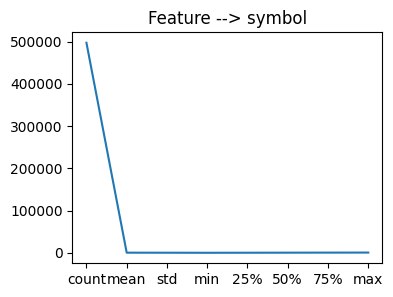

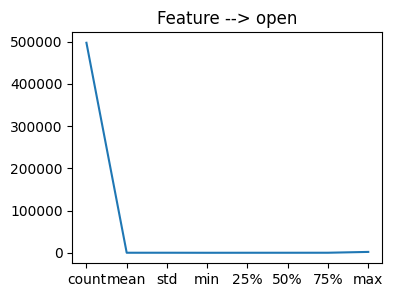

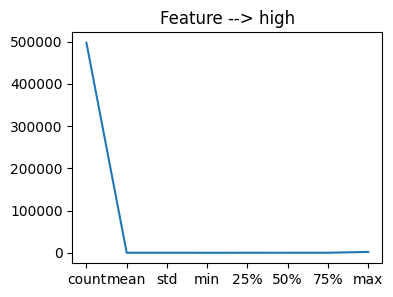

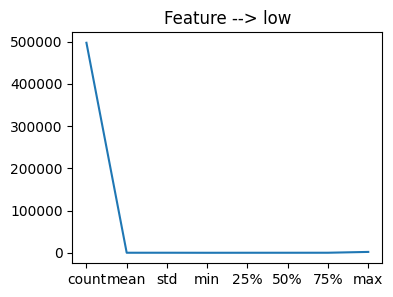

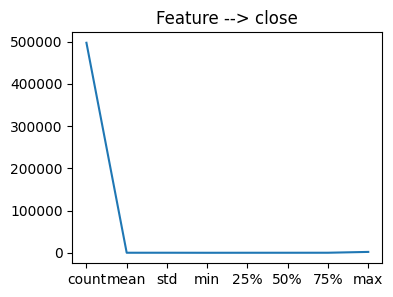

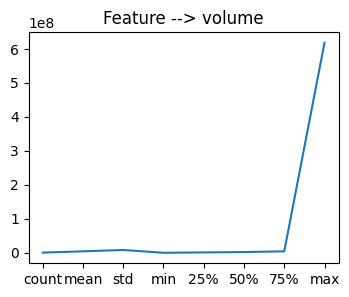

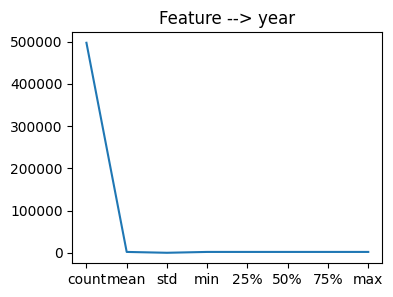

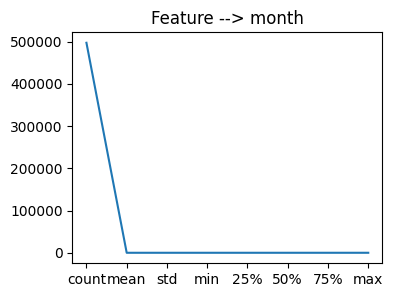

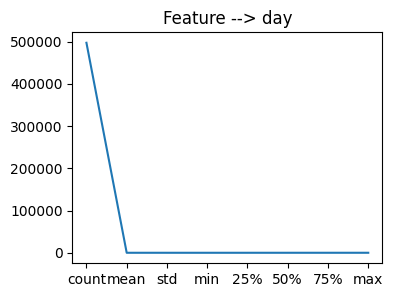

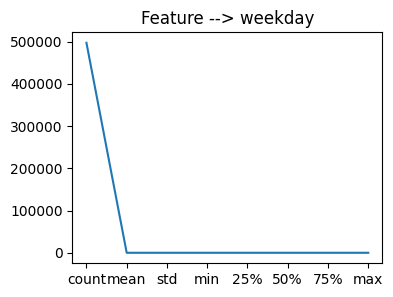

In [208]:
for i in df.columns:
    plt.figure(figsize=(4,3))
    plt.plot(df[i].describe())
    plt.title(f"Feature --> {i}")
    plt.show()

**Visualization of Data**

Boxplot to observe distribution of data

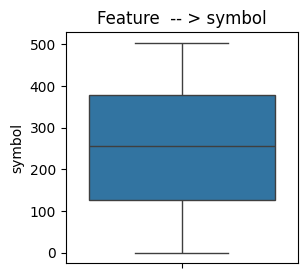

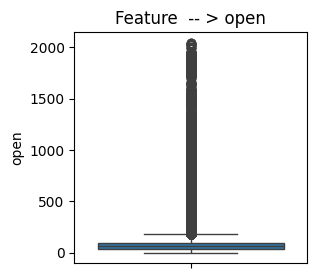

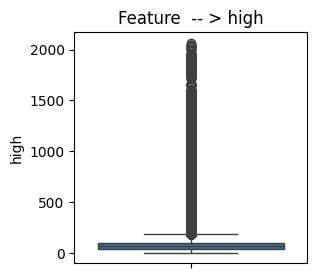

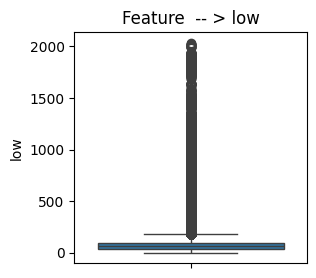

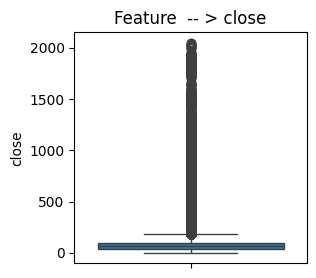

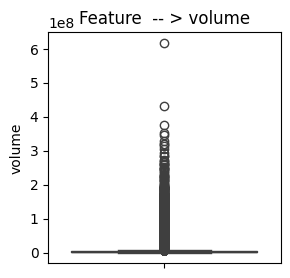

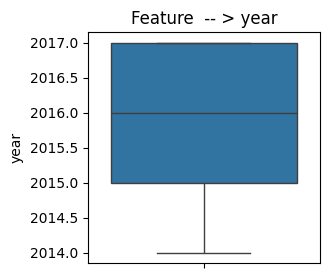

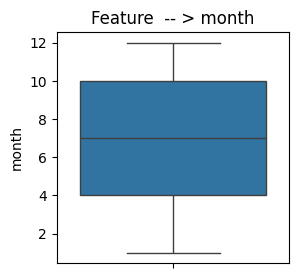

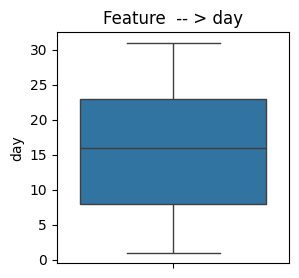

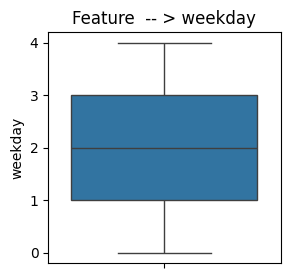

In [209]:
for i in df.columns:
    plt.figure(figsize=(3,3))
    sns.boxplot(df[i])
    plt.title(f"Feature  -- > {i}")
    plt.show()

Histogram for data destribution analysis

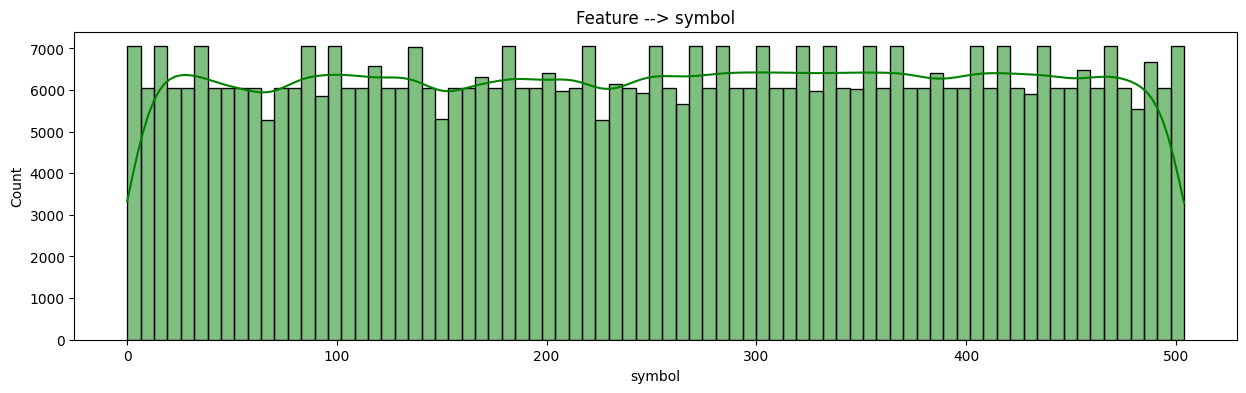

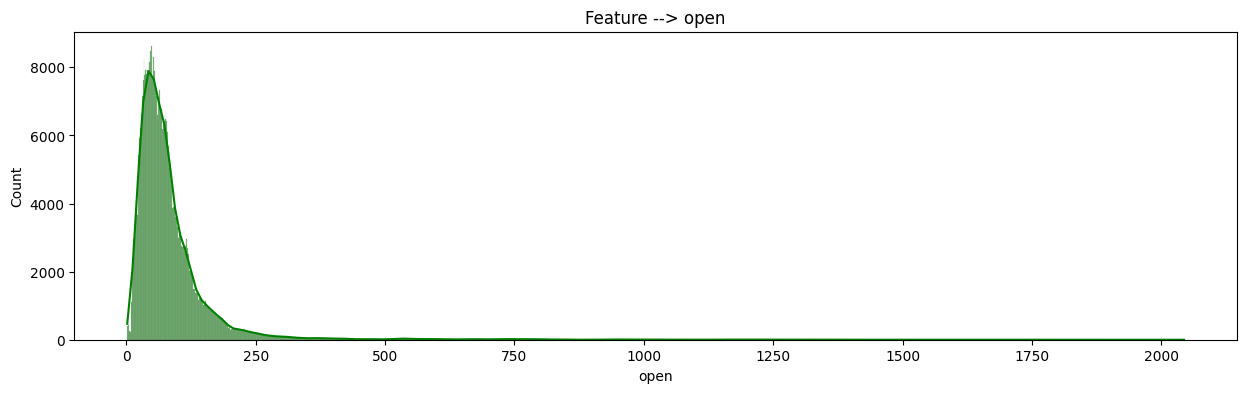

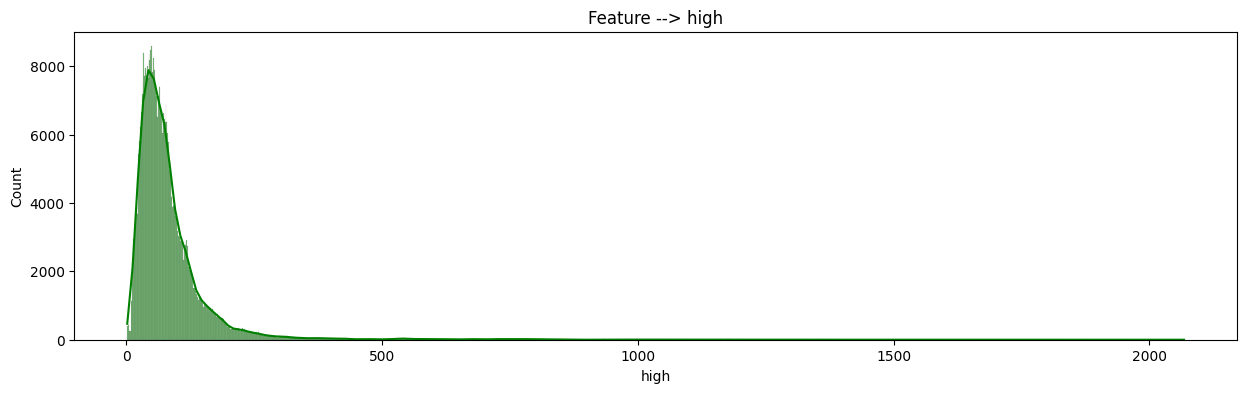

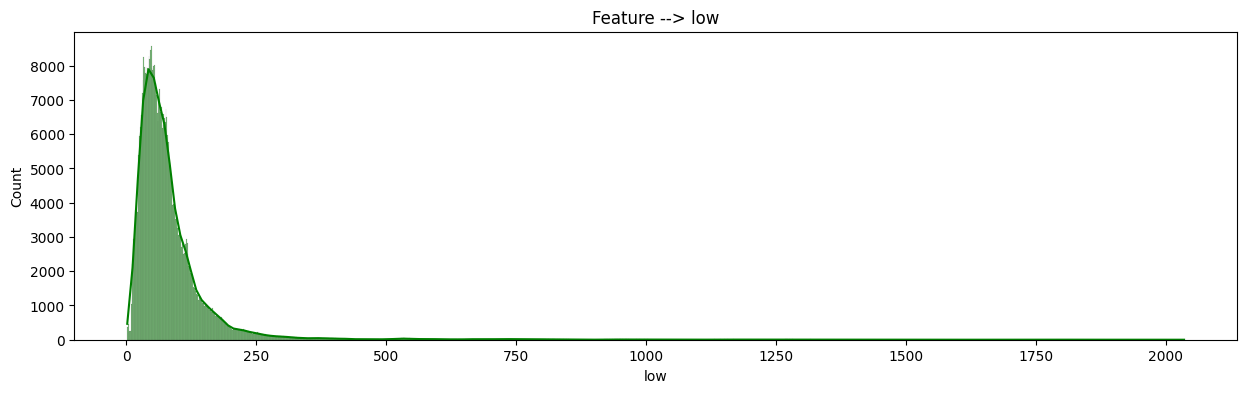

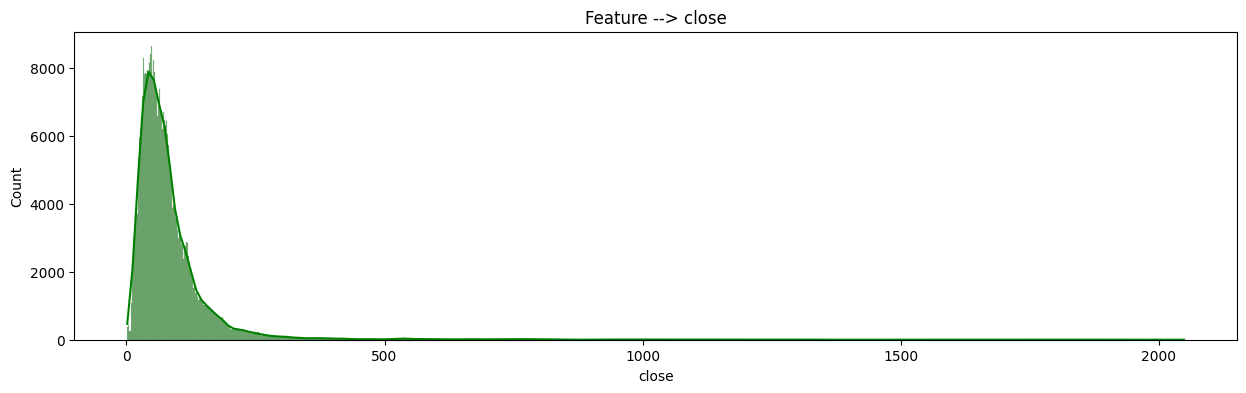

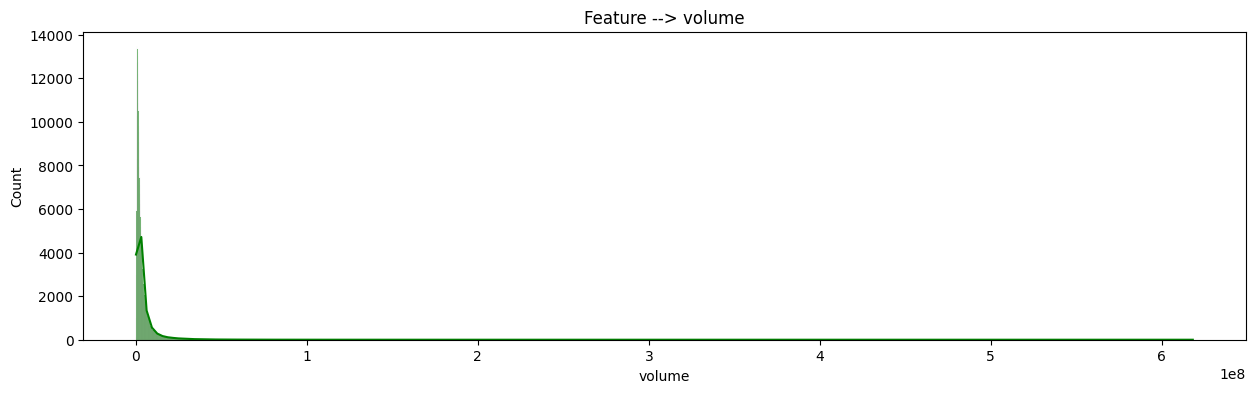

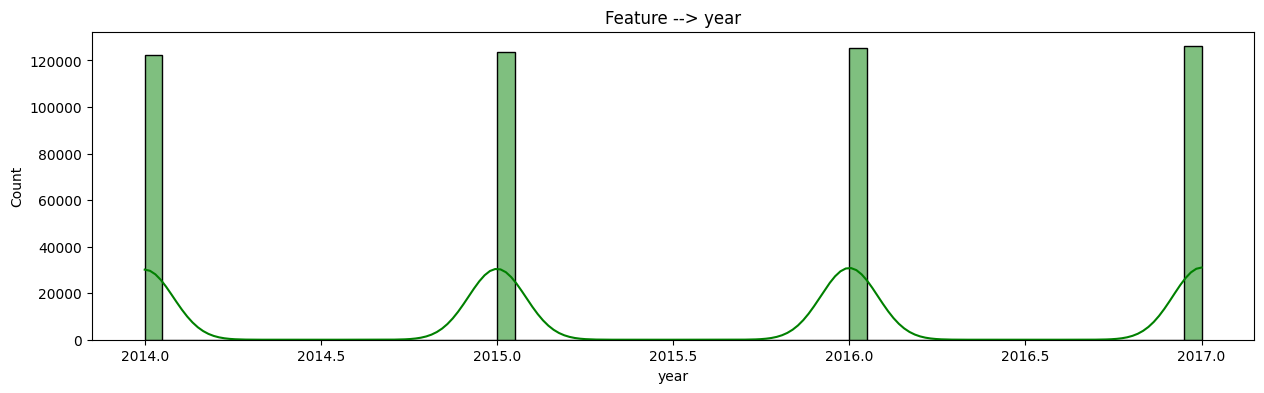

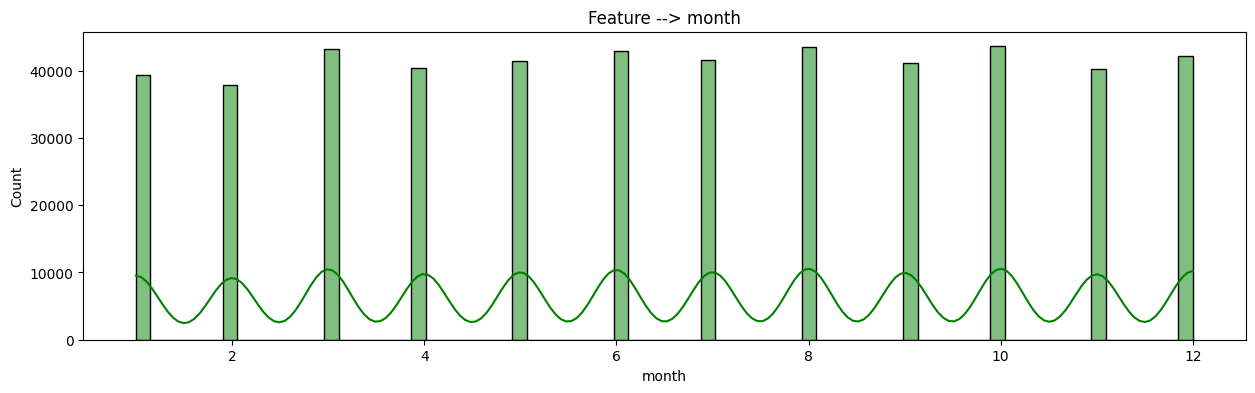

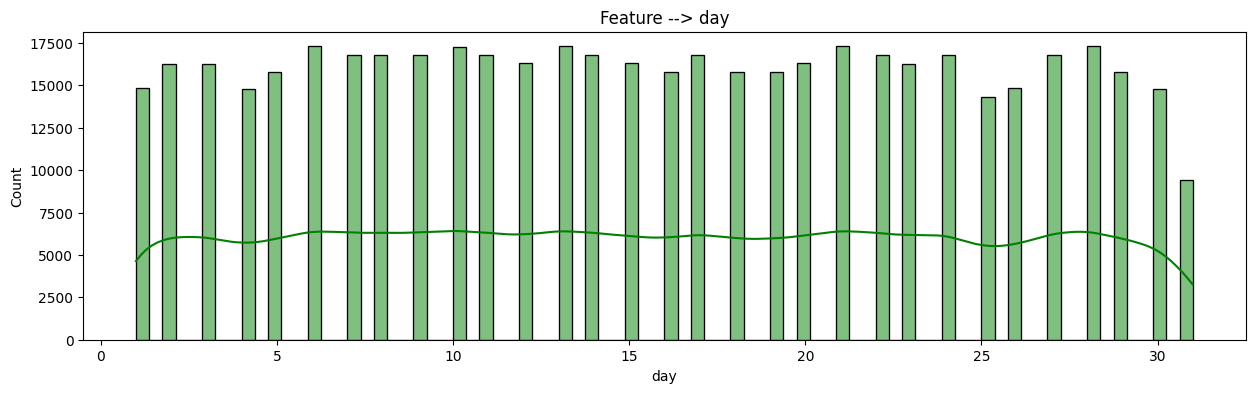

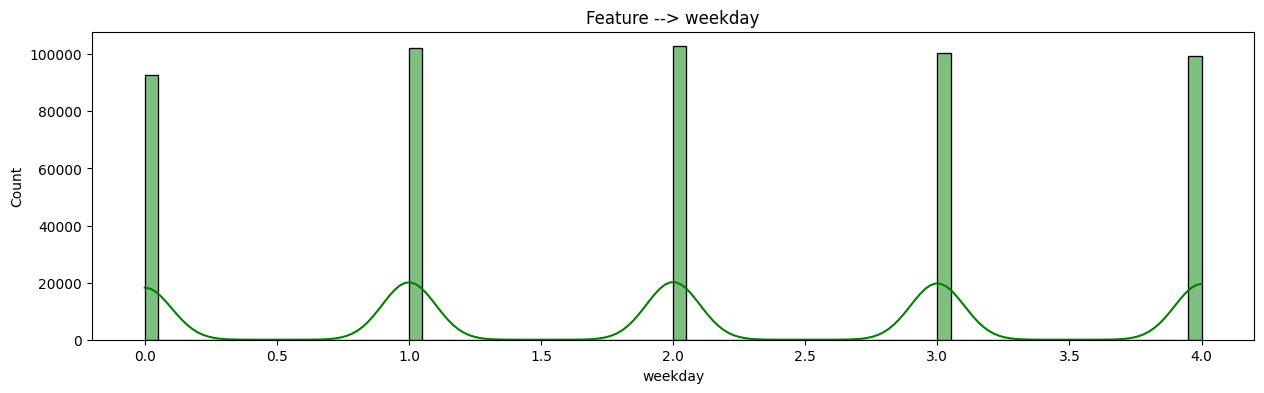

In [210]:
for i  in df.columns:
    plt.figure(figsize = (15,4))
    sns.histplot(df[i],kde=True,color="g")
    plt.title(f"Feature --> {i}")
    plt.show()


Scatter plots

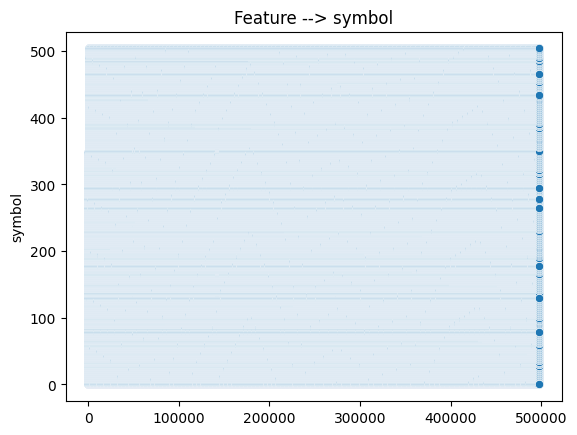

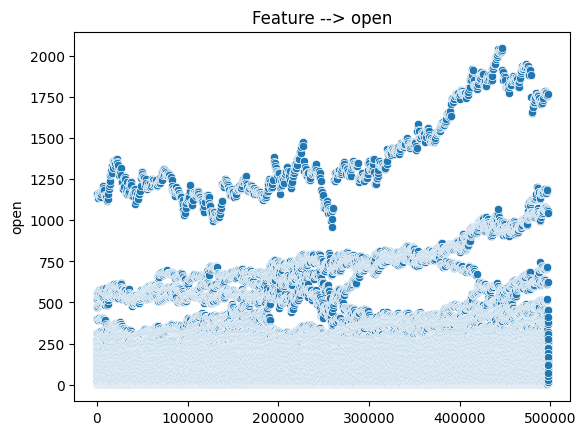

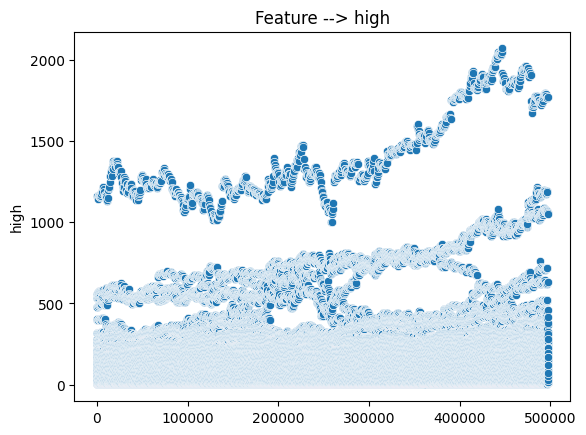

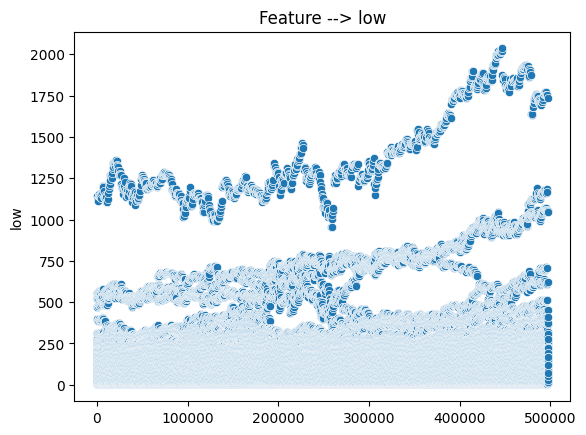

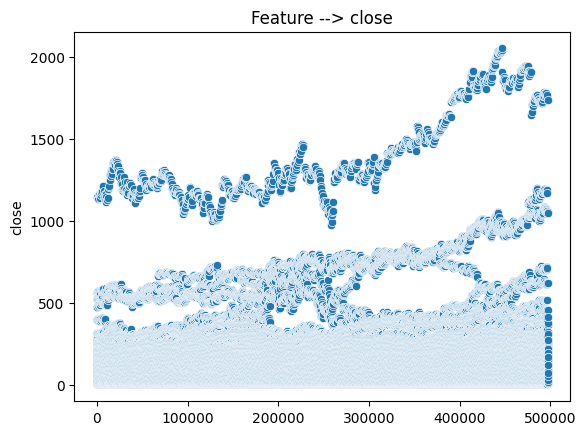

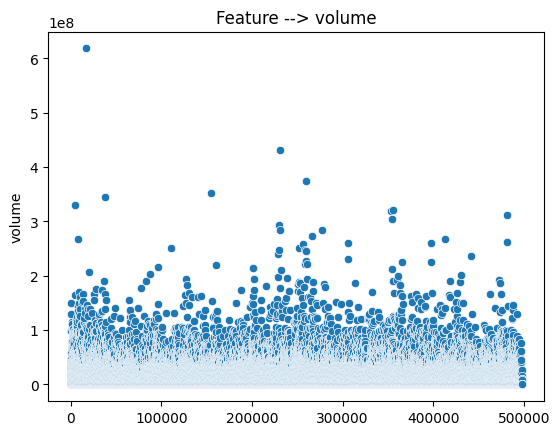

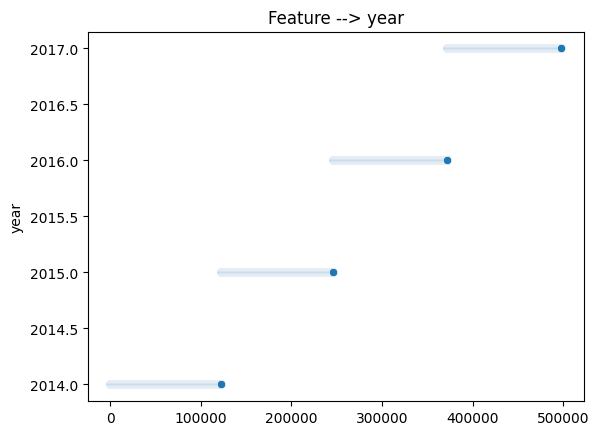

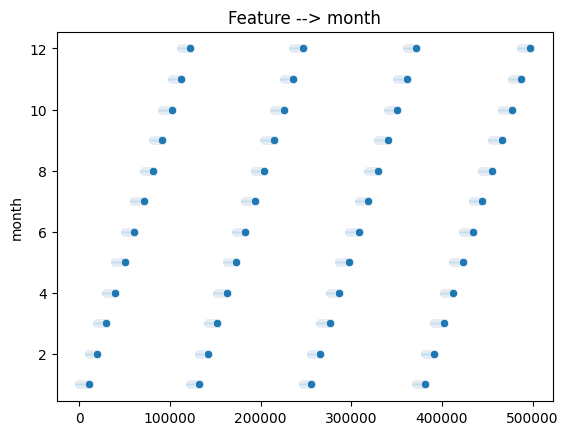

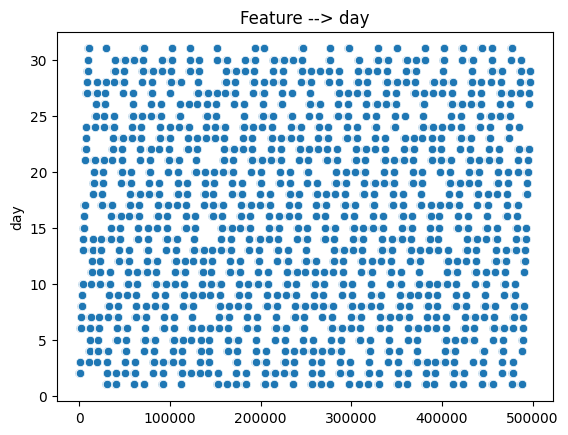

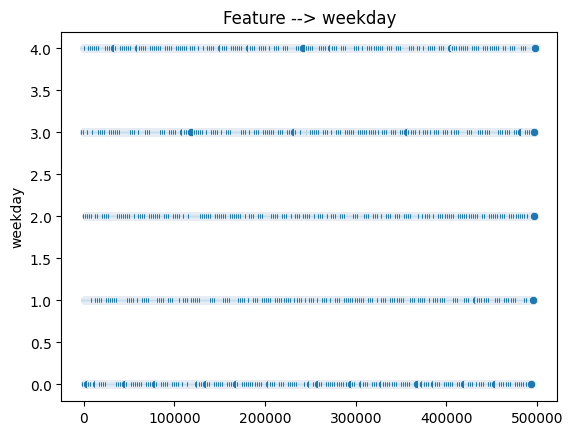

In [211]:
for i in df.columns:
    plt.Figure(figsize=(3,3))
    sns.scatterplot(df[i])
    plt.title(f"Feature --> {i}")
    plt.show()

# Correlation between feathures and ploting heatmap

In [213]:
print(df.corr())

           symbol      open      high       low     close    volume      year  \
symbol   1.000000 -0.035791 -0.035814 -0.035738 -0.035768 -0.059060  0.001987   
open    -0.035791  1.000000  0.999941  0.999928  0.999855 -0.148722  0.073363   
high    -0.035814  0.999941  1.000000  0.999905  0.999917 -0.148342  0.073103   
low     -0.035738  0.999928  0.999905  1.000000  0.999921 -0.149283  0.073715   
close   -0.035768  0.999855  0.999917  0.999921  1.000000 -0.148839  0.073468   
volume  -0.059060 -0.148722 -0.148342 -0.149283 -0.148839  1.000000 -0.004903   
year     0.001987  0.073363  0.073103  0.073715  0.073468 -0.004903  1.000000   
month   -0.000234  0.025007  0.024854  0.025202  0.024900 -0.019877 -0.002599   
day     -0.000012  0.002511  0.002391  0.002695  0.002406 -0.002047  0.000604   
weekday  0.000027  0.000620  0.000649  0.000547  0.000596  0.015506  0.010255   

            month       day   weekday  
symbol  -0.000234 -0.000012  0.000027  
open     0.025007  0.002511 

<Axes: >

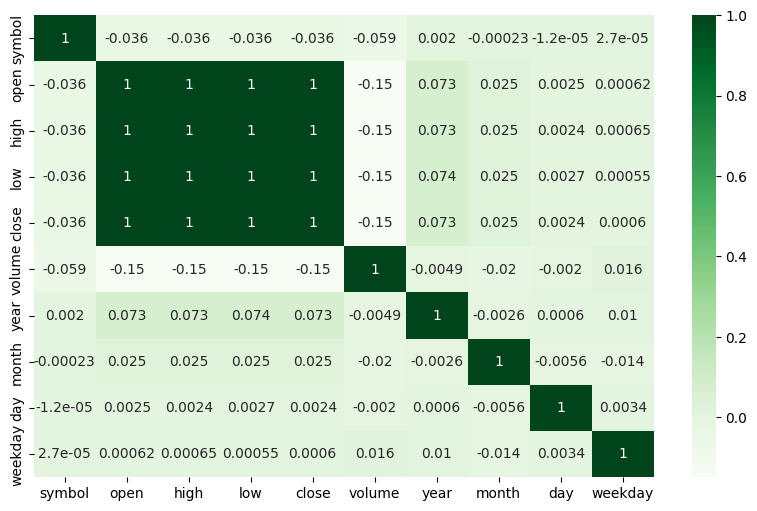

In [219]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap="Greens")